# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset, but on a new and very interesting dataset. We'll use the [Predict'em All](https://www.kaggle.com/semioniy/predictemall) dataset from Kaggle (download the dataset directly from them). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), having coordinates, time, weather, population density, distance to pokestops/ gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to ping-pong must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. [The python docs](https://docs.python.org/3/), [keras docs](https://keras.io/), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

## 0. Imports

Import any necessary modules here.

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy

from sklearn import preprocessing

## 1. Loading and extracting subset

Load the `'300k.csv'` file using pandas.

In [247]:
df = pd.read_csv('300k.csv', low_memory=False)


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [248]:
dfnew = df[['latitude','longitude','class']]
dfnew.head()

,latitude,longitude,class
0,20.525745,-97.460829,16
1,20.523695,-97.461167,133
2,38.903590,-77.199780,16
3,47.665903,-122.312561,13
4,47.666454,-122.311628,133


Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [249]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [250]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td>![Diglett](https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png)</td>
    <td>![Seel](https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf)</td>
    <td>![Tauros](https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616)</td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [251]:

dfnewfilterd = dfnew[dfnew['class'].isin([name_dict['Diglett'], name_dict['Seel'], name_dict['Tauros']])]

## 2. Visualization of the dataset

Plot histogram of the number of occurrences of each class.

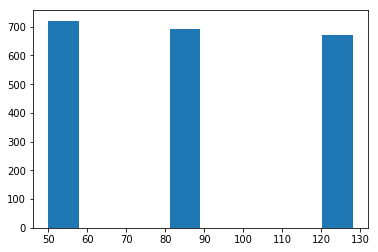

In [252]:
plt.hist(dfnewfilterd['class'])
plt.show()

# Is the dataset balanced?

**Your answer**: (Yes)

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

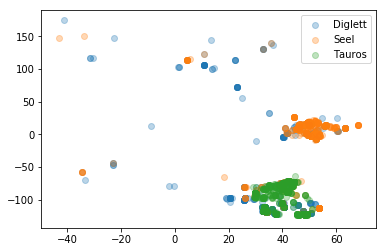

In [253]:

fig, ax = plt.subplots()
tempdf = dfnewfilterd.set_index('class')
for classes in ['Diglett', 'Seel', 'Tauros']:
    ax.scatter(tempdf.loc[name_dict[classes]]['latitude'],tempdf.loc[name_dict[classes]]['longitude'], label=classes, alpha = 0.3)

ax.legend()
plt.show()

Is there any other visualization you think would be useful? If so, insert it here.

How hard do you think the problem is? Which classes can/cannot be easily separated?

**Your answer**: (The problem is not linearly separable with zero loss but both Tauros and Seel are pretty well clusterd as one would expect from those two particular Pokémon's. Diglett on the other hand seem to have a much higher variance appering in relatively the same rate in both the Touros nest as well as the Seel nest. Diglett will thus be the hard one to predict, however the large varience for Digglet and the relative low varience for Seel and Tauros might make it much easier to classify Diglett the one might originaly expect   )

Which accuracy do you expect to achieve?

**Your answer**: (For bot Tauros and Seel I'm confident we will achive a higeh predictive accuracy for simply because of the relatively low varience of these two nests. Digglet on the other hand might be harder but then again the large spread of Diglett relative to the other two might actualy make it much easier to predict then one might expect. For some hard numbers I would estimate us geting around 95% predictive acuracy on Tauros about 80% on Seal and 75% on Diglett. But then again, looking at the requirement for this task it seams that I am way to optemistic in my predictions )

## 3. Preprocessing

Prepare input and output vectors.

In [254]:
input_vec = dfnewfilterd[['latitude', 'longitude']].as_matrix()[1:]
input_vec_scaled = preprocessing.scale(input_vec)

class_vec = dfnewfilterd['class'].as_matrix()[1:]
class_vec[class_vec == name_dict['Diglett']] = 0
class_vec[class_vec == name_dict['Seel']] = 1
class_vec[class_vec == name_dict['Tauros']] = 2

Separate your data into training and test sets. 20% of the data should be in the test set.

In [255]:
#np.random.shuffle(input_vec_scaled)
#np.random.shuffle(class_vec)
index = round(len(class_vec)*0.8)
print(index)
input_vec_train, input_vec_test = [input_vec_scaled[:index,:], input_vec_scaled[index:,:]]

class_vec_train, class_vec_test = [class_vec[:index], class_vec[index:]]
print(np.unique(class_vec_train))

1666
[0 1 2]


No handles with labels found to put in legend.


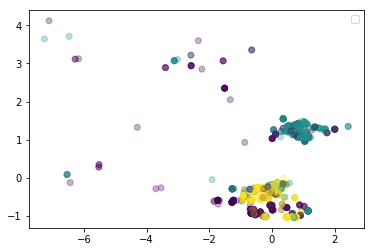

In [256]:
fig, ax = plt.subplots()

ax.scatter(input_vec_train[:,0],input_vec_train[:,1], c=class_vec_train, alpha = 0.3)

ax.legend()
plt.show()

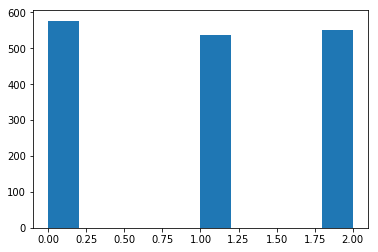

In [257]:
plt.hist(class_vec_train)
plt.show()

## 4. Training

Choose an architecture for your network.

In [277]:
l1 = Dense(40, input_shape = (2,), activation = 'relu')
l2 = Dense(20, activation = 'relu')
l3 = Dense(20, activation = 'relu')
l4 = Dense(3, activation = 'softmax')
model = Sequential([l1, l2, l3, l4])
model.compile(SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False),loss='categorical_crossentropy',metrics=['accuracy'])

Train the network. When training, separate 25% of your training data into a validation set.

In [278]:
one_hot_labels = keras.utils.to_categorical(class_vec_train, num_classes=3)

model.fit(x = input_vec_train, y = one_hot_labels,  batch_size=30, epochs=2000, verbose=1, validation_split=0.25, shuffle=True)

Train on 1249 samples, validate on 417 samples
Epoch 1/2000
1249/1249 [==============================] - 2s 2ms/step - loss: 1.0720 - acc: 0.3891 - val_loss: 1.0844 - val_acc: 0.3237
Epoch 2/2000
1249/1249 [==============================] - 0s 176us/step - loss: 1.0693 - acc: 0.4179 - val_loss: 1.0824 - val_acc: 0.3621
Epoch 3/2000
1249/1249 [==============================] - 0s 172us/step - loss: 1.0667 - acc: 0.4500 - val_loss: 1.0804 - val_acc: 0.3549
Epoch 4/2000
1249/1249 [==============================] - 0s 166us/step - loss: 1.0644 - acc: 0.4492 - val_loss: 1.0786 - val_acc: 0.3525
Epoch 5/2000
1249/1249 [==============================] - 0s 195us/step - loss: 1.0622 - acc: 0.4468 - val_loss: 1.0769 - val_acc: 0.3645
Epoch 6/2000
1249/1249 [==============================] - 0s 184us/step - loss: 1.0601 - acc: 0.4484 - val_loss: 1.0752 - val_acc: 0.3693
Epoch 7/2000
1249/1249 [==============================] - 0s 190us/step - loss: 1.0582 - acc: 0.4684 - val_loss: 1.0736 - val_a

1249/1249 [==============================] - 0s 165us/step - loss: 0.9763 - acc: 0.6349 - val_loss: 0.9863 - val_acc: 0.6475
Epoch 60/2000
1249/1249 [==============================] - 0s 165us/step - loss: 0.9746 - acc: 0.6429 - val_loss: 0.9841 - val_acc: 0.6523
Epoch 61/2000
1249/1249 [==============================] - 0s 162us/step - loss: 0.9728 - acc: 0.6421 - val_loss: 0.9818 - val_acc: 0.6595
Epoch 62/2000
1249/1249 [==============================] - 0s 170us/step - loss: 0.9710 - acc: 0.6421 - val_loss: 0.9795 - val_acc: 0.6595
Epoch 63/2000
1249/1249 [==============================] - 0s 170us/step - loss: 0.9692 - acc: 0.6421 - val_loss: 0.9772 - val_acc: 0.6595
Epoch 64/2000
1249/1249 [==============================] - 0s 185us/step - loss: 0.9674 - acc: 0.6461 - val_loss: 0.9748 - val_acc: 0.6643
Epoch 65/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.9656 - acc: 0.6501 - val_loss: 0.9725 - val_acc: 0.6859
Epoch 66/2000
1249/1249 [================

Epoch 118/2000
1249/1249 [==============================] - 0s 174us/step - loss: 0.8764 - acc: 0.6229 - val_loss: 0.8483 - val_acc: 0.6379
Epoch 119/2000
1249/1249 [==============================] - 0s 189us/step - loss: 0.8750 - acc: 0.6237 - val_loss: 0.8463 - val_acc: 0.6379
Epoch 120/2000
1249/1249 [==============================] - 0s 187us/step - loss: 0.8737 - acc: 0.6245 - val_loss: 0.8443 - val_acc: 0.6379
Epoch 121/2000
1249/1249 [==============================] - 0s 168us/step - loss: 0.8724 - acc: 0.6237 - val_loss: 0.8423 - val_acc: 0.6379
Epoch 122/2000
1249/1249 [==============================] - 0s 175us/step - loss: 0.8711 - acc: 0.6237 - val_loss: 0.8404 - val_acc: 0.6379
Epoch 123/2000
1249/1249 [==============================] - 0s 175us/step - loss: 0.8698 - acc: 0.6237 - val_loss: 0.8384 - val_acc: 0.6379
Epoch 124/2000
1249/1249 [==============================] - 0s 204us/step - loss: 0.8685 - acc: 0.6221 - val_loss: 0.8365 - val_acc: 0.6403
Epoch 125/2000
1249/

1249/1249 [==============================] - 0s 192us/step - loss: 0.8200 - acc: 0.6557 - val_loss: 0.7708 - val_acc: 0.6643
Epoch 177/2000
1249/1249 [==============================] - 0s 182us/step - loss: 0.8193 - acc: 0.6565 - val_loss: 0.7700 - val_acc: 0.6643
Epoch 178/2000
1249/1249 [==============================] - 0s 160us/step - loss: 0.8186 - acc: 0.6565 - val_loss: 0.7693 - val_acc: 0.6619
Epoch 179/2000
1249/1249 [==============================] - 0s 169us/step - loss: 0.8179 - acc: 0.6557 - val_loss: 0.7686 - val_acc: 0.6619
Epoch 180/2000
1249/1249 [==============================] - 0s 164us/step - loss: 0.8172 - acc: 0.6565 - val_loss: 0.7679 - val_acc: 0.6619
Epoch 181/2000
1249/1249 [==============================] - 0s 165us/step - loss: 0.8165 - acc: 0.6573 - val_loss: 0.7672 - val_acc: 0.6619
Epoch 182/2000
1249/1249 [==============================] - 0s 159us/step - loss: 0.8158 - acc: 0.6573 - val_loss: 0.7665 - val_acc: 0.6619
Epoch 183/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 176us/step - loss: 0.7851 - acc: 0.6621 - val_loss: 0.7416 - val_acc: 0.6835
Epoch 235/2000
1249/1249 [==============================] - 0s 180us/step - loss: 0.7846 - acc: 0.6653 - val_loss: 0.7412 - val_acc: 0.6835
Epoch 236/2000
1249/1249 [==============================] - 0s 181us/step - loss: 0.7841 - acc: 0.6693 - val_loss: 0.7409 - val_acc: 0.6811
Epoch 237/2000
1249/1249 [==============================] - 0s 175us/step - loss: 0.7837 - acc: 0.6725 - val_loss: 0.7405 - val_acc: 0.6595
Epoch 238/2000
1249/1249 [==============================] - 0s 160us/step - loss: 0.7832 - acc: 0.6605 - val_loss: 0.7401 - val_acc: 0.6595
Epoch 239/2000
1249/1249 [==============================] - 0s 188us/step - loss: 0.7827 - acc: 0.6645 - val_loss: 0.7399 - val_acc: 0.6595
Epoch 240/2000
1249/1249 [==============================] - 0s 178us/step - loss: 0.7822 - acc: 0.6597 - val_loss: 0.7396 - val_acc: 0.6595
Epoch 241/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 172us/step - loss: 0.7603 - acc: 0.7102 - val_loss: 0.7275 - val_acc: 0.7266
Epoch 293/2000
1249/1249 [==============================] - 0s 178us/step - loss: 0.7599 - acc: 0.7086 - val_loss: 0.7273 - val_acc: 0.7290
Epoch 294/2000
1249/1249 [==============================] - 0s 173us/step - loss: 0.7595 - acc: 0.7086 - val_loss: 0.7271 - val_acc: 0.7290
Epoch 295/2000
1249/1249 [==============================] - 0s 177us/step - loss: 0.7592 - acc: 0.7086 - val_loss: 0.7269 - val_acc: 0.7290
Epoch 296/2000
1249/1249 [==============================] - 0s 205us/step - loss: 0.7588 - acc: 0.7038 - val_loss: 0.7267 - val_acc: 0.7290
Epoch 297/2000
1249/1249 [==============================] - 0s 176us/step - loss: 0.7584 - acc: 0.7078 - val_loss: 0.7265 - val_acc: 0.7290
Epoch 298/2000
1249/1249 [==============================] - 0s 141us/step - loss: 0.7581 - acc: 0.7086 - val_loss: 0.7263 - val_acc: 0.7290
Epoch 299/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 181us/step - loss: 0.7430 - acc: 0.7070 - val_loss: 0.7206 - val_acc: 0.7218
Epoch 351/2000
1249/1249 [==============================] - 0s 157us/step - loss: 0.7428 - acc: 0.7054 - val_loss: 0.7205 - val_acc: 0.7242
Epoch 352/2000
1249/1249 [==============================] - 0s 163us/step - loss: 0.7425 - acc: 0.7110 - val_loss: 0.7203 - val_acc: 0.7170
Epoch 353/2000
1249/1249 [==============================] - 0s 152us/step - loss: 0.7423 - acc: 0.7070 - val_loss: 0.7203 - val_acc: 0.7170
Epoch 354/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.7421 - acc: 0.7054 - val_loss: 0.7203 - val_acc: 0.7170
Epoch 355/2000
1249/1249 [==============================] - 0s 184us/step - loss: 0.7419 - acc: 0.7046 - val_loss: 0.7202 - val_acc: 0.7170
Epoch 356/2000
1249/1249 [==============================] - 0s 177us/step - loss: 0.7416 - acc: 0.7046 - val_loss: 0.7201 - val_acc: 0.7218
Epoch 357/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 207us/step - loss: 0.7318 - acc: 0.7062 - val_loss: 0.7167 - val_acc: 0.7194
Epoch 409/2000
1249/1249 [==============================] - 0s 177us/step - loss: 0.7316 - acc: 0.7078 - val_loss: 0.7167 - val_acc: 0.7194
Epoch 410/2000
1249/1249 [==============================] - 0s 168us/step - loss: 0.7314 - acc: 0.7062 - val_loss: 0.7166 - val_acc: 0.7194
Epoch 411/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.7313 - acc: 0.7062 - val_loss: 0.7166 - val_acc: 0.7194
Epoch 412/2000
1249/1249 [==============================] - 0s 162us/step - loss: 0.7311 - acc: 0.7062 - val_loss: 0.7166 - val_acc: 0.7194
Epoch 413/2000
1249/1249 [==============================] - 0s 160us/step - loss: 0.7309 - acc: 0.7062 - val_loss: 0.7166 - val_acc: 0.7194
Epoch 414/2000
1249/1249 [==============================] - 0s 154us/step - loss: 0.7308 - acc: 0.7062 - val_loss: 0.7166 - val_acc: 0.7194
Epoch 415/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 175us/step - loss: 0.7243 - acc: 0.7078 - val_loss: 0.7157 - val_acc: 0.7194
Epoch 467/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.7242 - acc: 0.7070 - val_loss: 0.7156 - val_acc: 0.7194
Epoch 468/2000
1249/1249 [==============================] - 0s 177us/step - loss: 0.7241 - acc: 0.7070 - val_loss: 0.7155 - val_acc: 0.7194
Epoch 469/2000
1249/1249 [==============================] - 0s 156us/step - loss: 0.7240 - acc: 0.7070 - val_loss: 0.7155 - val_acc: 0.7194
Epoch 470/2000
1249/1249 [==============================] - 0s 187us/step - loss: 0.7238 - acc: 0.7070 - val_loss: 0.7155 - val_acc: 0.7194
Epoch 471/2000
1249/1249 [==============================] - 0s 176us/step - loss: 0.7238 - acc: 0.7078 - val_loss: 0.7155 - val_acc: 0.7194
Epoch 472/2000
1249/1249 [==============================] - 0s 182us/step - loss: 0.7236 - acc: 0.7078 - val_loss: 0.7155 - val_acc: 0.7194
Epoch 473/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 174us/step - loss: 0.7187 - acc: 0.7062 - val_loss: 0.7136 - val_acc: 0.7194
Epoch 525/2000
1249/1249 [==============================] - 0s 164us/step - loss: 0.7186 - acc: 0.7086 - val_loss: 0.7136 - val_acc: 0.7218
Epoch 526/2000
1249/1249 [==============================] - 0s 162us/step - loss: 0.7185 - acc: 0.7070 - val_loss: 0.7136 - val_acc: 0.7194
Epoch 527/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.7184 - acc: 0.7102 - val_loss: 0.7135 - val_acc: 0.7194
Epoch 528/2000
1249/1249 [==============================] - 0s 193us/step - loss: 0.7184 - acc: 0.7062 - val_loss: 0.7134 - val_acc: 0.7218
Epoch 529/2000
1249/1249 [==============================] - 0s 191us/step - loss: 0.7183 - acc: 0.7094 - val_loss: 0.7134 - val_acc: 0.7194
Epoch 530/2000
1249/1249 [==============================] - 0s 185us/step - loss: 0.7182 - acc: 0.7070 - val_loss: 0.7134 - val_acc: 0.7218
Epoch 531/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 168us/step - loss: 0.7138 - acc: 0.7102 - val_loss: 0.7111 - val_acc: 0.7218
Epoch 583/2000
1249/1249 [==============================] - 0s 157us/step - loss: 0.7137 - acc: 0.7118 - val_loss: 0.7111 - val_acc: 0.7218
Epoch 584/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.7136 - acc: 0.7118 - val_loss: 0.7110 - val_acc: 0.7218
Epoch 585/2000
1249/1249 [==============================] - 0s 176us/step - loss: 0.7136 - acc: 0.7110 - val_loss: 0.7110 - val_acc: 0.7218
Epoch 586/2000
1249/1249 [==============================] - 0s 178us/step - loss: 0.7134 - acc: 0.7118 - val_loss: 0.7109 - val_acc: 0.7218
Epoch 587/2000
1249/1249 [==============================] - 0s 187us/step - loss: 0.7134 - acc: 0.7118 - val_loss: 0.7107 - val_acc: 0.7218
Epoch 588/2000
1249/1249 [==============================] - 0s 181us/step - loss: 0.7133 - acc: 0.7118 - val_loss: 0.7108 - val_acc: 0.7218
Epoch 589/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 149us/step - loss: 0.7097 - acc: 0.7118 - val_loss: 0.7086 - val_acc: 0.7242
Epoch 641/2000
1249/1249 [==============================] - 0s 154us/step - loss: 0.7095 - acc: 0.7142 - val_loss: 0.7086 - val_acc: 0.7218
Epoch 642/2000
1249/1249 [==============================] - 0s 157us/step - loss: 0.7096 - acc: 0.7126 - val_loss: 0.7086 - val_acc: 0.7242
Epoch 643/2000
1249/1249 [==============================] - 0s 157us/step - loss: 0.7094 - acc: 0.7158 - val_loss: 0.7086 - val_acc: 0.7218
Epoch 644/2000
1249/1249 [==============================] - 0s 163us/step - loss: 0.7094 - acc: 0.7142 - val_loss: 0.7086 - val_acc: 0.7242
Epoch 645/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.7093 - acc: 0.7158 - val_loss: 0.7085 - val_acc: 0.7242
Epoch 646/2000
1249/1249 [==============================] - 0s 162us/step - loss: 0.7092 - acc: 0.7166 - val_loss: 0.7085 - val_acc: 0.7242
Epoch 647/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 157us/step - loss: 0.7063 - acc: 0.7126 - val_loss: 0.7072 - val_acc: 0.7242
Epoch 699/2000
1249/1249 [==============================] - 0s 171us/step - loss: 0.7062 - acc: 0.7150 - val_loss: 0.7072 - val_acc: 0.7242
Epoch 700/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.7061 - acc: 0.7142 - val_loss: 0.7071 - val_acc: 0.7242
Epoch 701/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.7060 - acc: 0.7158 - val_loss: 0.7071 - val_acc: 0.7242
Epoch 702/2000
1249/1249 [==============================] - 0s 176us/step - loss: 0.7060 - acc: 0.7126 - val_loss: 0.7070 - val_acc: 0.7242
Epoch 703/2000
1249/1249 [==============================] - 0s 158us/step - loss: 0.7060 - acc: 0.7150 - val_loss: 0.7073 - val_acc: 0.7242
Epoch 704/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.7059 - acc: 0.7150 - val_loss: 0.7072 - val_acc: 0.7242
Epoch 705/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 173us/step - loss: 0.7033 - acc: 0.7110 - val_loss: 0.7061 - val_acc: 0.7242
Epoch 757/2000
1249/1249 [==============================] - 0s 168us/step - loss: 0.7033 - acc: 0.7126 - val_loss: 0.7060 - val_acc: 0.7242
Epoch 758/2000
1249/1249 [==============================] - 0s 173us/step - loss: 0.7032 - acc: 0.7150 - val_loss: 0.7059 - val_acc: 0.7242
Epoch 759/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.7032 - acc: 0.7134 - val_loss: 0.7059 - val_acc: 0.7242
Epoch 760/2000
1249/1249 [==============================] - 0s 173us/step - loss: 0.7031 - acc: 0.7118 - val_loss: 0.7058 - val_acc: 0.7242
Epoch 761/2000
1249/1249 [==============================] - 0s 178us/step - loss: 0.7030 - acc: 0.7118 - val_loss: 0.7057 - val_acc: 0.7242
Epoch 762/2000
1249/1249 [==============================] - 0s 183us/step - loss: 0.7030 - acc: 0.7142 - val_loss: 0.7056 - val_acc: 0.7242
Epoch 763/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 164us/step - loss: 0.7006 - acc: 0.7142 - val_loss: 0.7047 - val_acc: 0.7242
Epoch 815/2000
1249/1249 [==============================] - 0s 165us/step - loss: 0.7006 - acc: 0.7118 - val_loss: 0.7047 - val_acc: 0.7242
Epoch 816/2000
1249/1249 [==============================] - 0s 170us/step - loss: 0.7005 - acc: 0.7142 - val_loss: 0.7047 - val_acc: 0.7242
Epoch 817/2000
1249/1249 [==============================] - 0s 165us/step - loss: 0.7005 - acc: 0.7142 - val_loss: 0.7047 - val_acc: 0.7242
Epoch 818/2000
1249/1249 [==============================] - 0s 187us/step - loss: 0.7004 - acc: 0.7118 - val_loss: 0.7047 - val_acc: 0.7242
Epoch 819/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.7004 - acc: 0.7134 - val_loss: 0.7046 - val_acc: 0.7242
Epoch 820/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.7005 - acc: 0.7126 - val_loss: 0.7045 - val_acc: 0.7242
Epoch 821/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 162us/step - loss: 0.6982 - acc: 0.7118 - val_loss: 0.7036 - val_acc: 0.7362
Epoch 873/2000
1249/1249 [==============================] - 0s 157us/step - loss: 0.6981 - acc: 0.7158 - val_loss: 0.7036 - val_acc: 0.7386
Epoch 874/2000
1249/1249 [==============================] - 0s 159us/step - loss: 0.6981 - acc: 0.7174 - val_loss: 0.7037 - val_acc: 0.7386
Epoch 875/2000
1249/1249 [==============================] - 0s 184us/step - loss: 0.6980 - acc: 0.7190 - val_loss: 0.7034 - val_acc: 0.7386
Epoch 876/2000
1249/1249 [==============================] - 0s 208us/step - loss: 0.6979 - acc: 0.7190 - val_loss: 0.7033 - val_acc: 0.7242
Epoch 877/2000
1249/1249 [==============================] - 0s 187us/step - loss: 0.6980 - acc: 0.7166 - val_loss: 0.7033 - val_acc: 0.7314
Epoch 878/2000
1249/1249 [==============================] - 0s 168us/step - loss: 0.6979 - acc: 0.7174 - val_loss: 0.7033 - val_acc: 0.7242
Epoch 879/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 172us/step - loss: 0.6957 - acc: 0.7214 - val_loss: 0.7019 - val_acc: 0.7482
Epoch 931/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.6958 - acc: 0.7222 - val_loss: 0.7019 - val_acc: 0.7482
Epoch 932/2000
1249/1249 [==============================] - 0s 174us/step - loss: 0.6958 - acc: 0.7214 - val_loss: 0.7019 - val_acc: 0.7482
Epoch 933/2000
1249/1249 [==============================] - 0s 178us/step - loss: 0.6956 - acc: 0.7222 - val_loss: 0.7019 - val_acc: 0.7482
Epoch 934/2000
1249/1249 [==============================] - 0s 185us/step - loss: 0.6955 - acc: 0.7214 - val_loss: 0.7021 - val_acc: 0.7482
Epoch 935/2000
1249/1249 [==============================] - 0s 184us/step - loss: 0.6956 - acc: 0.7214 - val_loss: 0.7020 - val_acc: 0.7482
Epoch 936/2000
1249/1249 [==============================] - 0s 176us/step - loss: 0.6955 - acc: 0.7214 - val_loss: 0.7018 - val_acc: 0.7482
Epoch 937/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 170us/step - loss: 0.6937 - acc: 0.7214 - val_loss: 0.7009 - val_acc: 0.7482
Epoch 989/2000
1249/1249 [==============================] - 0s 155us/step - loss: 0.6936 - acc: 0.7222 - val_loss: 0.7007 - val_acc: 0.7482
Epoch 990/2000
1249/1249 [==============================] - 0s 158us/step - loss: 0.6935 - acc: 0.7222 - val_loss: 0.7008 - val_acc: 0.7482
Epoch 991/2000
1249/1249 [==============================] - 0s 159us/step - loss: 0.6935 - acc: 0.7222 - val_loss: 0.7008 - val_acc: 0.7482
Epoch 992/2000
1249/1249 [==============================] - 0s 194us/step - loss: 0.6935 - acc: 0.7222 - val_loss: 0.7008 - val_acc: 0.7482
Epoch 993/2000
1249/1249 [==============================] - 0s 179us/step - loss: 0.6934 - acc: 0.7222 - val_loss: 0.7005 - val_acc: 0.7482
Epoch 994/2000
1249/1249 [==============================] - 0s 179us/step - loss: 0.6934 - acc: 0.7222 - val_loss: 0.7004 - val_acc: 0.7482
Epoch 995/2000
1249/1249 [=========

1249/1249 [==============================] - 0s 164us/step - loss: 0.6911 - acc: 0.7222 - val_loss: 0.6990 - val_acc: 0.7482
Epoch 1047/2000
1249/1249 [==============================] - 0s 168us/step - loss: 0.6911 - acc: 0.7214 - val_loss: 0.6989 - val_acc: 0.7482
Epoch 1048/2000
1249/1249 [==============================] - 0s 162us/step - loss: 0.6910 - acc: 0.7230 - val_loss: 0.6988 - val_acc: 0.7482
Epoch 1049/2000
1249/1249 [==============================] - 0s 184us/step - loss: 0.6910 - acc: 0.7214 - val_loss: 0.6988 - val_acc: 0.7482
Epoch 1050/2000
1249/1249 [==============================] - 0s 175us/step - loss: 0.6909 - acc: 0.7214 - val_loss: 0.6988 - val_acc: 0.7482
Epoch 1051/2000
1249/1249 [==============================] - 0s 184us/step - loss: 0.6909 - acc: 0.7214 - val_loss: 0.6987 - val_acc: 0.7482
Epoch 1052/2000
1249/1249 [==============================] - 0s 185us/step - loss: 0.6909 - acc: 0.7214 - val_loss: 0.6988 - val_acc: 0.7482
Epoch 1053/2000
1249/1249 [==

1249/1249 [==============================] - 0s 170us/step - loss: 0.6888 - acc: 0.7310 - val_loss: 0.6973 - val_acc: 0.7482
Epoch 1105/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.6887 - acc: 0.7294 - val_loss: 0.6972 - val_acc: 0.7482
Epoch 1106/2000
1249/1249 [==============================] - 0s 164us/step - loss: 0.6887 - acc: 0.7294 - val_loss: 0.6972 - val_acc: 0.7482
Epoch 1107/2000
1249/1249 [==============================] - 0s 173us/step - loss: 0.6887 - acc: 0.7302 - val_loss: 0.6971 - val_acc: 0.7482
Epoch 1108/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.6886 - acc: 0.7310 - val_loss: 0.6973 - val_acc: 0.7482
Epoch 1109/2000
1249/1249 [==============================] - 0s 162us/step - loss: 0.6886 - acc: 0.7278 - val_loss: 0.6973 - val_acc: 0.7482
Epoch 1110/2000
1249/1249 [==============================] - 0s 156us/step - loss: 0.6885 - acc: 0.7318 - val_loss: 0.6972 - val_acc: 0.7482
Epoch 1111/2000
1249/1249 [==

1249/1249 [==============================] - 0s 195us/step - loss: 0.6866 - acc: 0.7310 - val_loss: 0.6959 - val_acc: 0.7482
Epoch 1163/2000
1249/1249 [==============================] - 0s 177us/step - loss: 0.6866 - acc: 0.7302 - val_loss: 0.6958 - val_acc: 0.7482
Epoch 1164/2000
1249/1249 [==============================] - 0s 192us/step - loss: 0.6866 - acc: 0.7270 - val_loss: 0.6957 - val_acc: 0.7482
Epoch 1165/2000
1249/1249 [==============================] - 0s 173us/step - loss: 0.6865 - acc: 0.7310 - val_loss: 0.6957 - val_acc: 0.7482
Epoch 1166/2000
1249/1249 [==============================] - 0s 200us/step - loss: 0.6866 - acc: 0.7294 - val_loss: 0.6957 - val_acc: 0.7482
Epoch 1167/2000
1249/1249 [==============================] - 0s 186us/step - loss: 0.6866 - acc: 0.7302 - val_loss: 0.6959 - val_acc: 0.7482
Epoch 1168/2000
1249/1249 [==============================] - 0s 181us/step - loss: 0.6865 - acc: 0.7310 - val_loss: 0.6960 - val_acc: 0.7482
Epoch 1169/2000
1249/1249 [==

1249/1249 [==============================] - 0s 175us/step - loss: 0.6845 - acc: 0.7310 - val_loss: 0.6953 - val_acc: 0.7482
Epoch 1221/2000
1249/1249 [==============================] - 0s 190us/step - loss: 0.6844 - acc: 0.7310 - val_loss: 0.6954 - val_acc: 0.7482
Epoch 1222/2000
1249/1249 [==============================] - 0s 174us/step - loss: 0.6843 - acc: 0.7286 - val_loss: 0.6953 - val_acc: 0.7482
Epoch 1223/2000
1249/1249 [==============================] - 0s 182us/step - loss: 0.6842 - acc: 0.7310 - val_loss: 0.6954 - val_acc: 0.7482
Epoch 1224/2000
1249/1249 [==============================] - 0s 174us/step - loss: 0.6842 - acc: 0.7310 - val_loss: 0.6953 - val_acc: 0.7482
Epoch 1225/2000
1249/1249 [==============================] - 0s 178us/step - loss: 0.6842 - acc: 0.7310 - val_loss: 0.6952 - val_acc: 0.7482
Epoch 1226/2000
1249/1249 [==============================] - 0s 170us/step - loss: 0.6842 - acc: 0.7310 - val_loss: 0.6951 - val_acc: 0.7482
Epoch 1227/2000
1249/1249 [==

1249/1249 [==============================] - 0s 169us/step - loss: 0.6825 - acc: 0.7310 - val_loss: 0.6940 - val_acc: 0.7482
Epoch 1279/2000
1249/1249 [==============================] - 0s 176us/step - loss: 0.6824 - acc: 0.7310 - val_loss: 0.6939 - val_acc: 0.7482
Epoch 1280/2000
1249/1249 [==============================] - 0s 165us/step - loss: 0.6825 - acc: 0.7310 - val_loss: 0.6939 - val_acc: 0.7482
Epoch 1281/2000
1249/1249 [==============================] - 0s 153us/step - loss: 0.6824 - acc: 0.7310 - val_loss: 0.6939 - val_acc: 0.7482
Epoch 1282/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.6822 - acc: 0.7310 - val_loss: 0.6939 - val_acc: 0.7482
Epoch 1283/2000
1249/1249 [==============================] - 0s 160us/step - loss: 0.6822 - acc: 0.7278 - val_loss: 0.6939 - val_acc: 0.7482
Epoch 1284/2000
1249/1249 [==============================] - 0s 162us/step - loss: 0.6823 - acc: 0.7310 - val_loss: 0.6940 - val_acc: 0.7482
Epoch 1285/2000
1249/1249 [==

1249/1249 [==============================] - 0s 175us/step - loss: 0.6805 - acc: 0.7310 - val_loss: 0.6933 - val_acc: 0.7482
Epoch 1337/2000
1249/1249 [==============================] - 0s 177us/step - loss: 0.6805 - acc: 0.7318 - val_loss: 0.6933 - val_acc: 0.7482
Epoch 1338/2000
1249/1249 [==============================] - 0s 171us/step - loss: 0.6806 - acc: 0.7310 - val_loss: 0.6933 - val_acc: 0.7482
Epoch 1339/2000
1249/1249 [==============================] - 0s 186us/step - loss: 0.6807 - acc: 0.7326 - val_loss: 0.6931 - val_acc: 0.7482
Epoch 1340/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.6805 - acc: 0.7302 - val_loss: 0.6930 - val_acc: 0.7482
Epoch 1341/2000
1249/1249 [==============================] - 0s 181us/step - loss: 0.6805 - acc: 0.7310 - val_loss: 0.6931 - val_acc: 0.7482
Epoch 1342/2000
1249/1249 [==============================] - 0s 160us/step - loss: 0.6804 - acc: 0.7302 - val_loss: 0.6932 - val_acc: 0.7482
Epoch 1343/2000
1249/1249 [==

1249/1249 [==============================] - 0s 160us/step - loss: 0.6789 - acc: 0.7326 - val_loss: 0.6924 - val_acc: 0.7482
Epoch 1395/2000
1249/1249 [==============================] - 0s 170us/step - loss: 0.6788 - acc: 0.7318 - val_loss: 0.6925 - val_acc: 0.7482
Epoch 1396/2000
1249/1249 [==============================] - 0s 171us/step - loss: 0.6788 - acc: 0.7326 - val_loss: 0.6924 - val_acc: 0.7482
Epoch 1397/2000
1249/1249 [==============================] - 0s 160us/step - loss: 0.6789 - acc: 0.7334 - val_loss: 0.6925 - val_acc: 0.7482
Epoch 1398/2000
1249/1249 [==============================] - 0s 185us/step - loss: 0.6787 - acc: 0.7318 - val_loss: 0.6924 - val_acc: 0.7482
Epoch 1399/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.6788 - acc: 0.7302 - val_loss: 0.6925 - val_acc: 0.7482
Epoch 1400/2000
1249/1249 [==============================] - 0s 184us/step - loss: 0.6788 - acc: 0.7318 - val_loss: 0.6922 - val_acc: 0.7482
Epoch 1401/2000
1249/1249 [==

1249/1249 [==============================] - 0s 174us/step - loss: 0.6773 - acc: 0.7342 - val_loss: 0.6918 - val_acc: 0.7506
Epoch 1453/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.6774 - acc: 0.7342 - val_loss: 0.6919 - val_acc: 0.7482
Epoch 1454/2000
1249/1249 [==============================] - 0s 184us/step - loss: 0.6772 - acc: 0.7326 - val_loss: 0.6918 - val_acc: 0.7482
Epoch 1455/2000
1249/1249 [==============================] - 0s 190us/step - loss: 0.6772 - acc: 0.7318 - val_loss: 0.6919 - val_acc: 0.7482
Epoch 1456/2000
1249/1249 [==============================] - 0s 180us/step - loss: 0.6771 - acc: 0.7334 - val_loss: 0.6919 - val_acc: 0.7482
Epoch 1457/2000
1249/1249 [==============================] - 0s 188us/step - loss: 0.6771 - acc: 0.7326 - val_loss: 0.6919 - val_acc: 0.7482
Epoch 1458/2000
1249/1249 [==============================] - 0s 184us/step - loss: 0.6771 - acc: 0.7326 - val_loss: 0.6917 - val_acc: 0.7482
Epoch 1459/2000
1249/1249 [==

1249/1249 [==============================] - 0s 180us/step - loss: 0.6757 - acc: 0.7326 - val_loss: 0.6912 - val_acc: 0.7506
Epoch 1511/2000
1249/1249 [==============================] - 0s 188us/step - loss: 0.6757 - acc: 0.7342 - val_loss: 0.6910 - val_acc: 0.7506
Epoch 1512/2000
1249/1249 [==============================] - 0s 205us/step - loss: 0.6757 - acc: 0.7318 - val_loss: 0.6913 - val_acc: 0.7482
Epoch 1513/2000
1249/1249 [==============================] - 0s 173us/step - loss: 0.6757 - acc: 0.7350 - val_loss: 0.6914 - val_acc: 0.7482
Epoch 1514/2000
1249/1249 [==============================] - 0s 169us/step - loss: 0.6755 - acc: 0.7318 - val_loss: 0.6914 - val_acc: 0.7506
Epoch 1515/2000
1249/1249 [==============================] - 0s 168us/step - loss: 0.6756 - acc: 0.7342 - val_loss: 0.6912 - val_acc: 0.7506
Epoch 1516/2000
1249/1249 [==============================] - 0s 168us/step - loss: 0.6756 - acc: 0.7334 - val_loss: 0.6912 - val_acc: 0.7482
Epoch 1517/2000
1249/1249 [==

1249/1249 [==============================] - 0s 176us/step - loss: 0.6743 - acc: 0.7350 - val_loss: 0.6907 - val_acc: 0.7506
Epoch 1569/2000
1249/1249 [==============================] - 0s 172us/step - loss: 0.6743 - acc: 0.7350 - val_loss: 0.6906 - val_acc: 0.7506
Epoch 1570/2000
1249/1249 [==============================] - 0s 189us/step - loss: 0.6744 - acc: 0.7350 - val_loss: 0.6908 - val_acc: 0.7482
Epoch 1571/2000
1249/1249 [==============================] - 0s 196us/step - loss: 0.6744 - acc: 0.7358 - val_loss: 0.6908 - val_acc: 0.7482
Epoch 1572/2000
1249/1249 [==============================] - 0s 188us/step - loss: 0.6743 - acc: 0.7366 - val_loss: 0.6906 - val_acc: 0.7506
Epoch 1573/2000
1249/1249 [==============================] - 0s 170us/step - loss: 0.6743 - acc: 0.7350 - val_loss: 0.6908 - val_acc: 0.7506
Epoch 1574/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.6743 - acc: 0.7334 - val_loss: 0.6907 - val_acc: 0.7506
Epoch 1575/2000
1249/1249 [==

1249/1249 [==============================] - 0s 182us/step - loss: 0.6733 - acc: 0.7358 - val_loss: 0.6898 - val_acc: 0.7506
Epoch 1627/2000
1249/1249 [==============================] - 0s 175us/step - loss: 0.6731 - acc: 0.7334 - val_loss: 0.6900 - val_acc: 0.7506
Epoch 1628/2000
1249/1249 [==============================] - 0s 165us/step - loss: 0.6730 - acc: 0.7366 - val_loss: 0.6901 - val_acc: 0.7506
Epoch 1629/2000
1249/1249 [==============================] - 0s 149us/step - loss: 0.6731 - acc: 0.7310 - val_loss: 0.6900 - val_acc: 0.7506
Epoch 1630/2000
1249/1249 [==============================] - 0s 157us/step - loss: 0.6730 - acc: 0.7350 - val_loss: 0.6898 - val_acc: 0.7506
Epoch 1631/2000
1249/1249 [==============================] - 0s 166us/step - loss: 0.6732 - acc: 0.7366 - val_loss: 0.6898 - val_acc: 0.7506
Epoch 1632/2000
1249/1249 [==============================] - 0s 173us/step - loss: 0.6730 - acc: 0.7358 - val_loss: 0.6896 - val_acc: 0.7506
Epoch 1633/2000
1249/1249 [==

1249/1249 [==============================] - 0s 154us/step - loss: 0.6720 - acc: 0.7358 - val_loss: 0.6885 - val_acc: 0.7506
Epoch 1685/2000
1249/1249 [==============================] - 0s 153us/step - loss: 0.6719 - acc: 0.7358 - val_loss: 0.6882 - val_acc: 0.7506
Epoch 1686/2000
1249/1249 [==============================] - 0s 164us/step - loss: 0.6719 - acc: 0.7350 - val_loss: 0.6883 - val_acc: 0.7506
Epoch 1687/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.6720 - acc: 0.7350 - val_loss: 0.6884 - val_acc: 0.7506
Epoch 1688/2000
1249/1249 [==============================] - 0s 166us/step - loss: 0.6718 - acc: 0.7342 - val_loss: 0.6886 - val_acc: 0.7506
Epoch 1689/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.6719 - acc: 0.7366 - val_loss: 0.6884 - val_acc: 0.7506
Epoch 1690/2000
1249/1249 [==============================] - 0s 149us/step - loss: 0.6719 - acc: 0.7366 - val_loss: 0.6882 - val_acc: 0.7506
Epoch 1691/2000
1249/1249 [==

1249/1249 [==============================] - 0s 176us/step - loss: 0.6709 - acc: 0.7342 - val_loss: 0.6878 - val_acc: 0.7506
Epoch 1743/2000
1249/1249 [==============================] - 0s 191us/step - loss: 0.6710 - acc: 0.7366 - val_loss: 0.6877 - val_acc: 0.7506
Epoch 1744/2000
1249/1249 [==============================] - 0s 195us/step - loss: 0.6709 - acc: 0.7366 - val_loss: 0.6877 - val_acc: 0.7506
Epoch 1745/2000
1249/1249 [==============================] - 0s 189us/step - loss: 0.6709 - acc: 0.7342 - val_loss: 0.6877 - val_acc: 0.7506
Epoch 1746/2000
1249/1249 [==============================] - 0s 180us/step - loss: 0.6707 - acc: 0.7366 - val_loss: 0.6875 - val_acc: 0.7506
Epoch 1747/2000
1249/1249 [==============================] - 0s 164us/step - loss: 0.6709 - acc: 0.7342 - val_loss: 0.6875 - val_acc: 0.7506
Epoch 1748/2000
1249/1249 [==============================] - 0s 179us/step - loss: 0.6708 - acc: 0.7366 - val_loss: 0.6876 - val_acc: 0.7506
Epoch 1749/2000
1249/1249 [==

1249/1249 [==============================] - 0s 157us/step - loss: 0.6700 - acc: 0.7318 - val_loss: 0.6865 - val_acc: 0.7506
Epoch 1801/2000
1249/1249 [==============================] - 0s 151us/step - loss: 0.6698 - acc: 0.7374 - val_loss: 0.6864 - val_acc: 0.7506
Epoch 1802/2000
1249/1249 [==============================] - 0s 183us/step - loss: 0.6699 - acc: 0.7374 - val_loss: 0.6864 - val_acc: 0.7506
Epoch 1803/2000
1249/1249 [==============================] - 0s 160us/step - loss: 0.6699 - acc: 0.7374 - val_loss: 0.6864 - val_acc: 0.7506
Epoch 1804/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.6700 - acc: 0.7358 - val_loss: 0.6864 - val_acc: 0.7506
Epoch 1805/2000
1249/1249 [==============================] - 0s 150us/step - loss: 0.6700 - acc: 0.7358 - val_loss: 0.6864 - val_acc: 0.7506
Epoch 1806/2000
1249/1249 [==============================] - 0s 157us/step - loss: 0.6699 - acc: 0.7350 - val_loss: 0.6866 - val_acc: 0.7506
Epoch 1807/2000
1249/1249 [==

1249/1249 [==============================] - 0s 160us/step - loss: 0.6690 - acc: 0.7374 - val_loss: 0.6858 - val_acc: 0.7506
Epoch 1859/2000
1249/1249 [==============================] - 0s 163us/step - loss: 0.6690 - acc: 0.7374 - val_loss: 0.6857 - val_acc: 0.7506
Epoch 1860/2000
1249/1249 [==============================] - 0s 155us/step - loss: 0.6689 - acc: 0.7358 - val_loss: 0.6857 - val_acc: 0.7506
Epoch 1861/2000
1249/1249 [==============================] - 0s 160us/step - loss: 0.6688 - acc: 0.7366 - val_loss: 0.6855 - val_acc: 0.7530
Epoch 1862/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.6689 - acc: 0.7382 - val_loss: 0.6854 - val_acc: 0.7530
Epoch 1863/2000
1249/1249 [==============================] - 0s 157us/step - loss: 0.6690 - acc: 0.7382 - val_loss: 0.6855 - val_acc: 0.7506
Epoch 1864/2000
1249/1249 [==============================] - 0s 158us/step - loss: 0.6687 - acc: 0.7374 - val_loss: 0.6858 - val_acc: 0.7506
Epoch 1865/2000
1249/1249 [==

1249/1249 [==============================] - 0s 171us/step - loss: 0.6681 - acc: 0.7358 - val_loss: 0.6845 - val_acc: 0.7506
Epoch 1917/2000
1249/1249 [==============================] - 0s 163us/step - loss: 0.6681 - acc: 0.7382 - val_loss: 0.6847 - val_acc: 0.7530
Epoch 1918/2000
1249/1249 [==============================] - 0s 173us/step - loss: 0.6683 - acc: 0.7398 - val_loss: 0.6849 - val_acc: 0.7506
Epoch 1919/2000
1249/1249 [==============================] - 0s 165us/step - loss: 0.6681 - acc: 0.7382 - val_loss: 0.6849 - val_acc: 0.7530
Epoch 1920/2000
1249/1249 [==============================] - 0s 161us/step - loss: 0.6681 - acc: 0.7382 - val_loss: 0.6850 - val_acc: 0.7530
Epoch 1921/2000
1249/1249 [==============================] - 0s 166us/step - loss: 0.6680 - acc: 0.7382 - val_loss: 0.6849 - val_acc: 0.7530
Epoch 1922/2000
1249/1249 [==============================] - 0s 182us/step - loss: 0.6680 - acc: 0.7398 - val_loss: 0.6848 - val_acc: 0.7530
Epoch 1923/2000
1249/1249 [==

1249/1249 [==============================] - 0s 166us/step - loss: 0.6675 - acc: 0.7382 - val_loss: 0.6843 - val_acc: 0.7530
Epoch 1975/2000
1249/1249 [==============================] - 0s 170us/step - loss: 0.6672 - acc: 0.7398 - val_loss: 0.6841 - val_acc: 0.7530
Epoch 1976/2000
1249/1249 [==============================] - 0s 167us/step - loss: 0.6678 - acc: 0.7382 - val_loss: 0.6841 - val_acc: 0.7530
Epoch 1977/2000
1249/1249 [==============================] - 0s 163us/step - loss: 0.6673 - acc: 0.7406 - val_loss: 0.6842 - val_acc: 0.7530
Epoch 1978/2000
1249/1249 [==============================] - 0s 164us/step - loss: 0.6672 - acc: 0.7398 - val_loss: 0.6841 - val_acc: 0.7530
Epoch 1979/2000
1249/1249 [==============================] - 0s 149us/step - loss: 0.6673 - acc: 0.7374 - val_loss: 0.6841 - val_acc: 0.7530
Epoch 1980/2000
1249/1249 [==============================] - 0s 153us/step - loss: 0.6673 - acc: 0.7390 - val_loss: 0.6842 - val_acc: 0.7530
Epoch 1981/2000
1249/1249 [==

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [281]:
one_hot_labels_Test = keras.utils.to_categorical(class_vec_test, num_classes=3)
score = model.evaluate(input_vec_test, one_hot_labels_Test, batch_size=10)
print(score)

416/416 [==============================] - 0s 221us/step
[0.7436421083716246, 0.7043269266589329]


Compute the confusion matrix of your predictions on the test set.

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Answer**: (fill in here)

Is(are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer**: (fill in here)

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer**: (fill in here)

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?